In [12]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf
import numpy
from keras.models import load_model
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.src.utils import to_categorical
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.backend import image_data_format
# Задаем seed для повторяемости результатов

# Устанавливаем seed для повторяемости результатов
numpy.random.seed(42)

# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Формирование вектора размерности (зависит от параметра из файла keras.json)
input_shape = ((1, *X_train.shape[1:]) if 
               image_data_format() == 'channels_first' else 
               (*X_train.shape[1:], 1))

# Преобразование размерности изображений
X_train = X_train.reshape(X_train.shape[0], *input_shape)
X_test = X_test.reshape(X_test.shape[0], *input_shape)

# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

# Создаем последовательную модель
model = Sequential()

model.add(Conv2D(75, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компилируем модель
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=["accuracy"])

print(model.summary())

# Обучаем сеть
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.2, 
          verbose=1)

# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 75)     │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 100)      │       187,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       800,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 995,060 (3.80 MB)

 Trainable params: 995,060 (3.80 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 65s 169ms/step - accuracy: 0.8405 - loss: 0.4906 - val_accuracy: 0.9837 - val_loss: 0.0529
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 179ms/step - accuracy: 0.9793 - loss: 0.0674 - val_accuracy: 0.9866 - val_loss: 0.0460
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 179ms/step - accuracy: 0.9841 - loss: 0.0494 - val_accuracy: 0.9889 - val_loss: 0.0354
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 68s 180ms/step - accuracy: 0.9887 - loss: 0.0352 - val_accuracy: 0.9899 - val_loss: 0.0353
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 197ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.9915 - val_loss: 0.0307
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 227ms/step - accuracy: 0.9929 - loss: 0.0236 - val_accuracy: 0.9925 - val_loss: 0.0268
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 194ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9929 - val_loss: 0.0279
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 68s 181ms/step - accuracy: 0.9942 - lo

In [13]:
model.save("D:/BSU-Projects/6th-Term/Neural-Net/Lab_8/models/model.keras")

In [14]:
from keras.models import load_model

import matplotlib.pyplot as plt

import numpy

In [15]:
img = plt.imread("D:/BSU-Projects/6th-Term/Neural-Net/Lab_8/data/7.png")
img = img[:, :, 1]

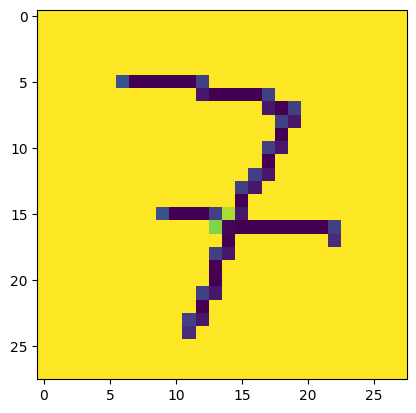

In [16]:
plt.imshow(img)

In [17]:
img = numpy.array(img.reshape(28, 28, 1))

img = 1 - img

img = numpy.array([img])

img

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [18]:
loaded_model = load_model('D:/BSU-Projects/6th-Term/Neural-Net/Lab_8/models/model.keras')

In [19]:
prediction = loaded_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


In [20]:
# print(np.argmax(prediction))
prediction

array([[3.4807433e-13, 9.3726600e-09, 8.4520307e-06, 5.4903771e-06,
        3.9609466e-07, 5.4300613e-12, 4.6347231e-14, 9.9998558e-01,
        4.7666063e-08, 1.9325988e-08]], dtype=float32)